In [1]:
import pandas as pd
import numpy as np
import talib as ta
import pyupbit as up
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import load_model

In [2]:
from Fuctions import df_proc, predict, visualization, pred_UpDown, mask_UpDown, mask_check, earning_rate

In [3]:
# Load saved Models
all_model = load_model("gru_all.h5")
t_model = load_model("gru_trends.h5")
tv_model = load_model("gru_trends_volume.h5")
tmp_model = load_model("gru_trends_market_positive.h5")
e_model = load_model("gru_elasticity.h5")
tm_model = load_model("gru_trends_market.h5")
em_model = load_model("gru_elasticity_market.h5")
p_model = load_model("gru_positive.h5")
c_model = load_model("gru_only_close.h5")

In [21]:
# Bring Data
df_data = df_proc()

In [22]:
# Indexing
input_var = df_data.columns[df_data.columns != 'Close']
input_var_trends = ['MA5', 'MA20', 'RSI', 'MACD', 'Signal', 'Hist', 'ADX', 'ROC', 'CCI', 'DMI+', 'DMI-']
input_var_tne = ['MA5', 'MA20', 'RSI', 'MACD', 'Signal', 'Hist', 'ADX', 'ROC', 'CCI', 'DMI+', 'DMI-', 
                 'Upper', 'Middle', 'Lower', 'SlowK', 'SlowD', 'ATR']
input_var_tnv = ['MA5', 'MA20', 'RSI', 'MACD', 'Signal', 'Hist', 'ADX', 'ROC', 'CCI', 'DMI+', 'DMI-', 'OBV']
input_var_tnm_plus = ['MA5', 'MA20', 'RSI', 'MACD', 'Signal', 'Hist', 'ADX', 'ROC', 'CCI', 'DMI+', 'DMI-', 'MFI',
                     'Upper', 'Middle', 'Lower', 'ATR', 'OBV']
input_var_elasticity = ['Upper', 'Middle', 'Lower', 'SlowK', 'SlowD', 'ATR']
input_var_tnm = ['MA5', 'MA20', 'RSI', 'MACD', 'Signal', 'Hist', 'ADX', 'ROC', 'CCI', 'DMI+', 'DMI-', 'MFI']
input_var_enm = ['Upper', 'Middle', 'Lower', 'SlowK', 'SlowD', 'ATR', 'MFI']
input_var_plus = ['MA5', 'MA20', 'Upper', 'Middle', 'Lower', 'ATR', 'OBV']
input_var_close = ['MA5', 'MA20', 'RSI', 'MACD', 'ROC']

len(input_var)

19

# Predict

In [23]:
price_all = predict(df_data, input_var, all_model, len(input_var))

15/15 [==============================] - 0s 5ms/step
41746084.0


In [24]:
price_t = predict(df_data, input_var_trends, t_model, len(input_var_trends))

15/15 [==============================] - 0s 4ms/step
42314760.0


In [25]:
price_tv = predict(df_data, input_var_tnv, tv_model, len(input_var_tnv))

15/15 [==============================] - 0s 4ms/step
41635960.0


In [26]:
price_tm = predict(df_data, input_var_tnm, tm_model, len(input_var_tnm))

15/15 [==============================] - 0s 4ms/step
42247380.0


In [27]:
price_tmp = predict(df_data, input_var_tnm_plus, tmp_model, len(input_var_tnm_plus))

15/15 [==============================] - 1s 5ms/step
43613790.0


In [28]:
price_e = predict(df_data, input_var_elasticity, e_model, len(input_var_elasticity))

15/15 [==============================] - 0s 2ms/step
39867730.0


In [29]:
price_em = predict(df_data, input_var_enm, em_model, len(input_var_enm))

15/15 [==============================] - 0s 3ms/step
43350200.0


In [30]:
price_p = predict(df_data, input_var_plus, p_model, len(input_var_plus))

15/15 [==============================] - 0s 3ms/step
41258428.0


In [31]:
price_c = predict(df_data, input_var_close, c_model, len(input_var_close))

15/15 [==============================] - 0s 2ms/step
42608560.0


# Visualization

In [32]:
close = []
for i in range(0, len(df_data['Close'])):
    close.append(df_data['Close'][i])

### 1. All

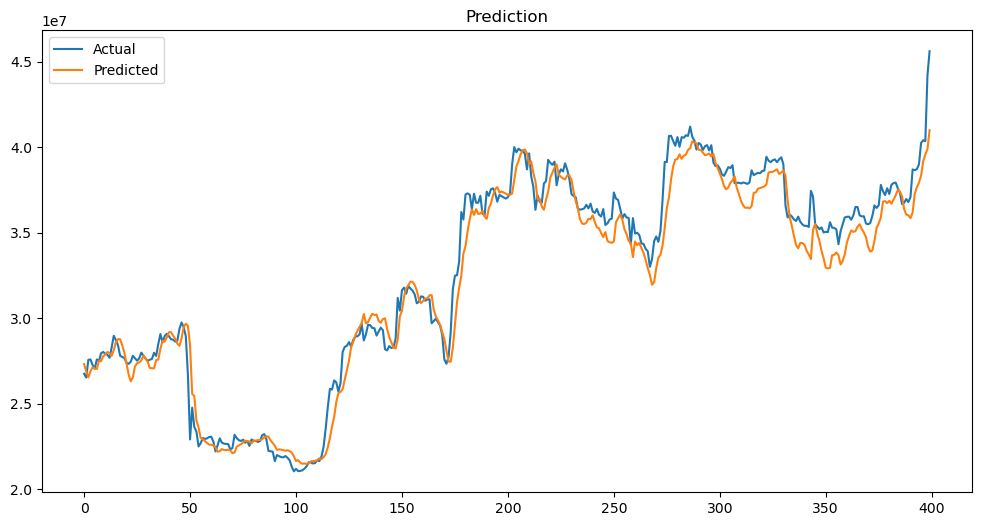

In [35]:
# int(days), dot = 'Y' or 'N'(Choose display dot on graph)
visualization(close, price_all, 400, dot = 'N')

### 2. Trends

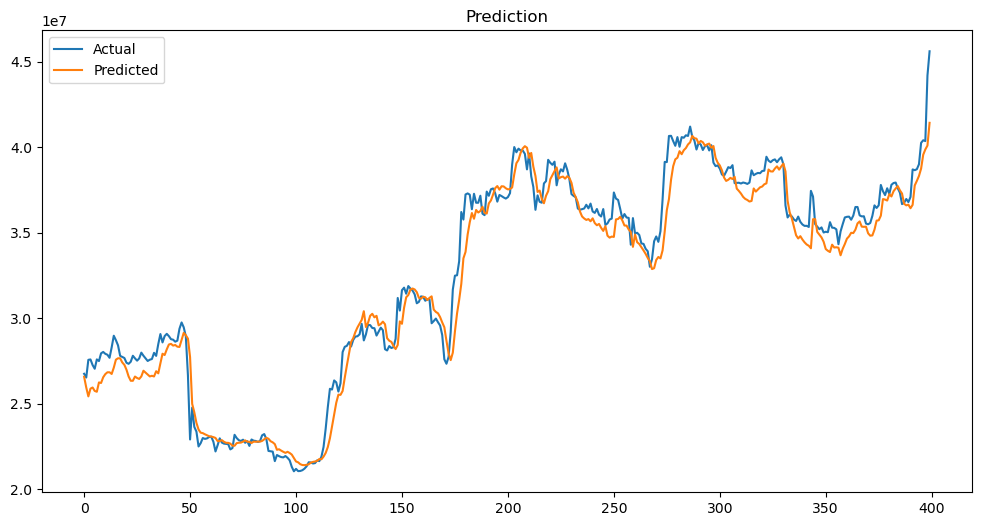

In [36]:
visualization(close, price_t, 400, dot = 'N')

### 3. Trends and Volume

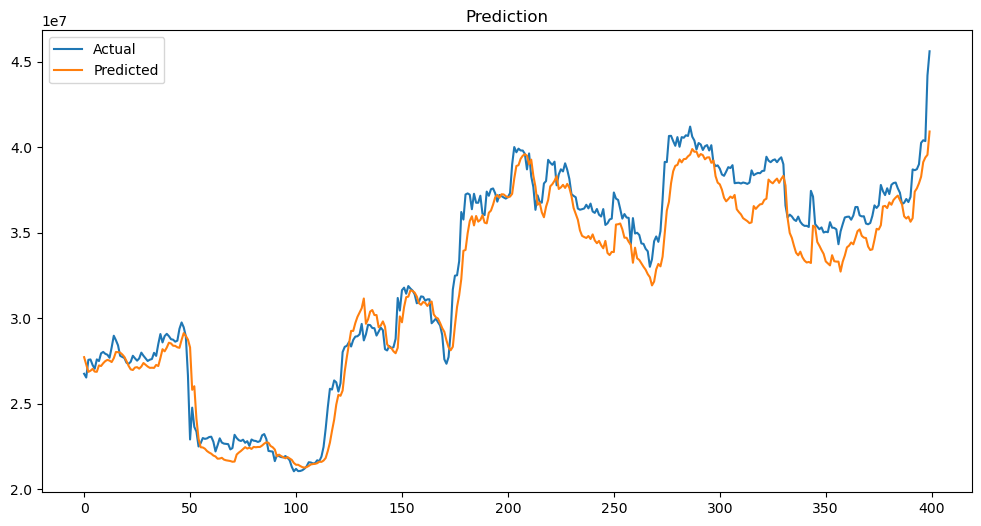

In [37]:
visualization(close, price_tv, 400, dot = 'N')

### 4. Trends and Market

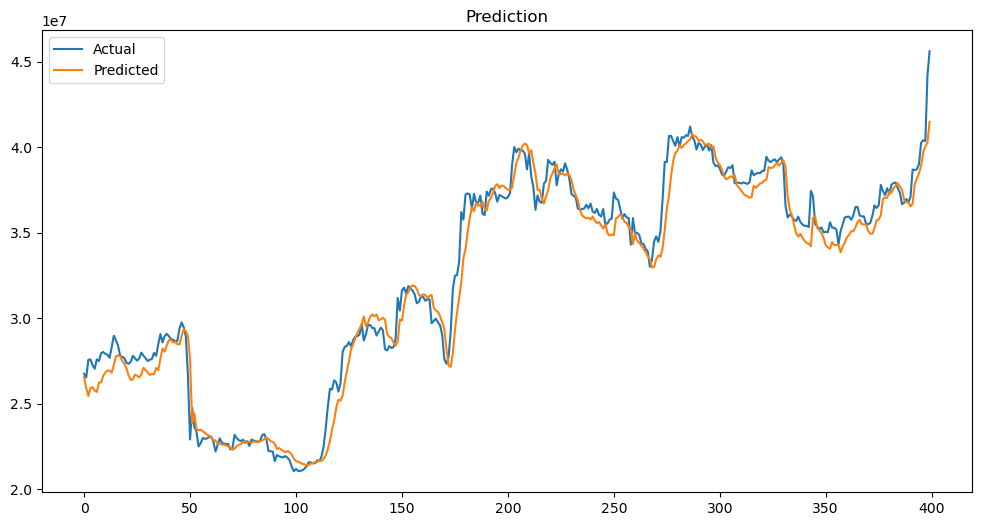

In [38]:
visualization(close, price_tm, 400, dot = 'N')

### 5. Trends and Market with Positive Correlation

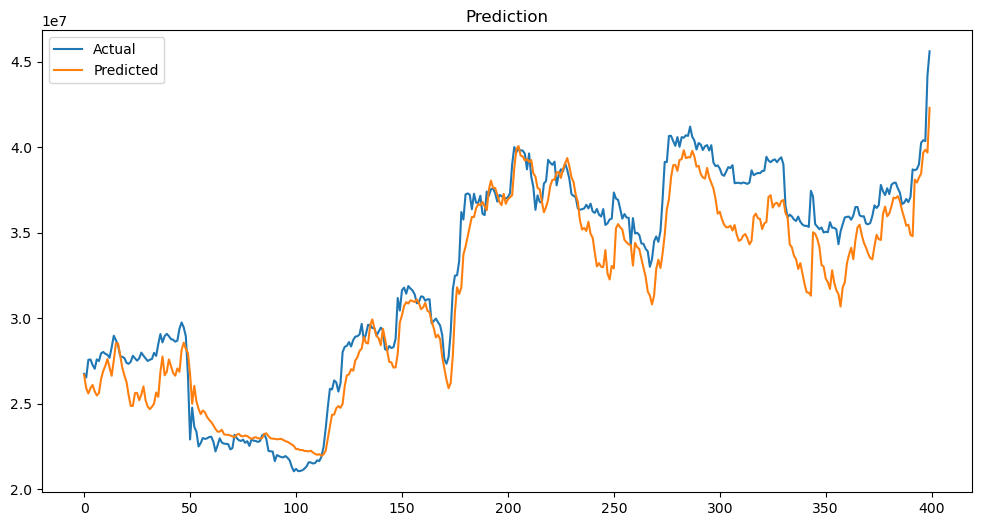

In [39]:
visualization(close, price_tmp, 400, dot = 'N')

### 6. Elasticity

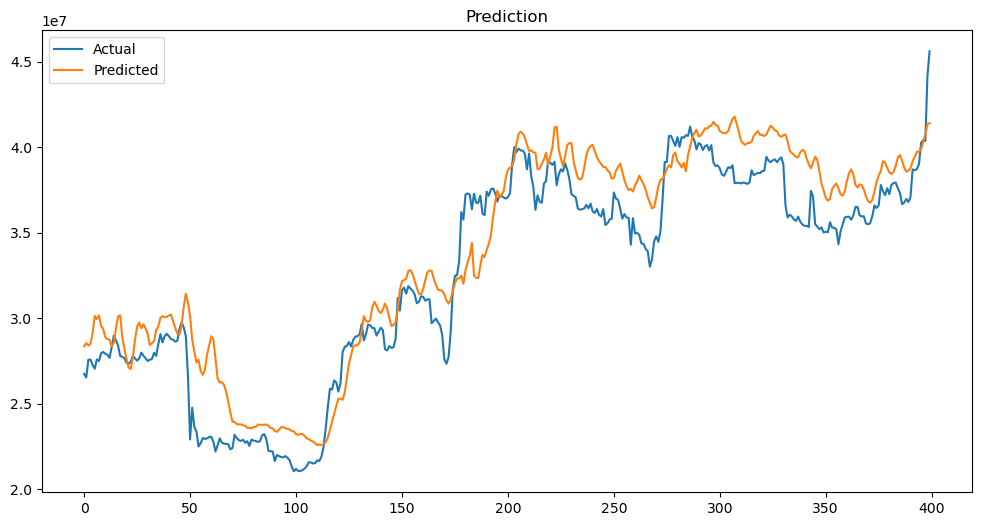

In [40]:
visualization(close, price_e, 400, dot = 'N')

### 7. Elasticity and Market 

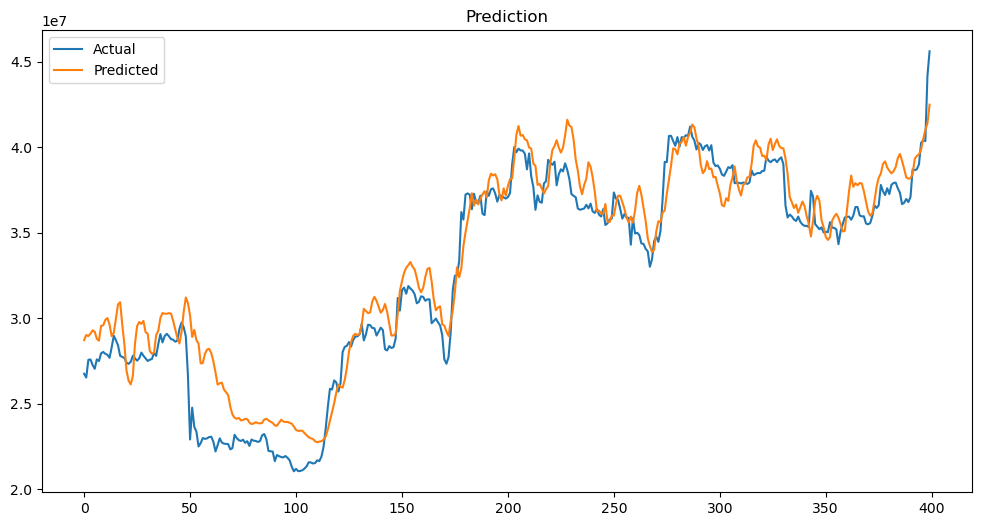

In [41]:
visualization(close, price_em, 400, dot = 'N')

### 8. Positive Correlation

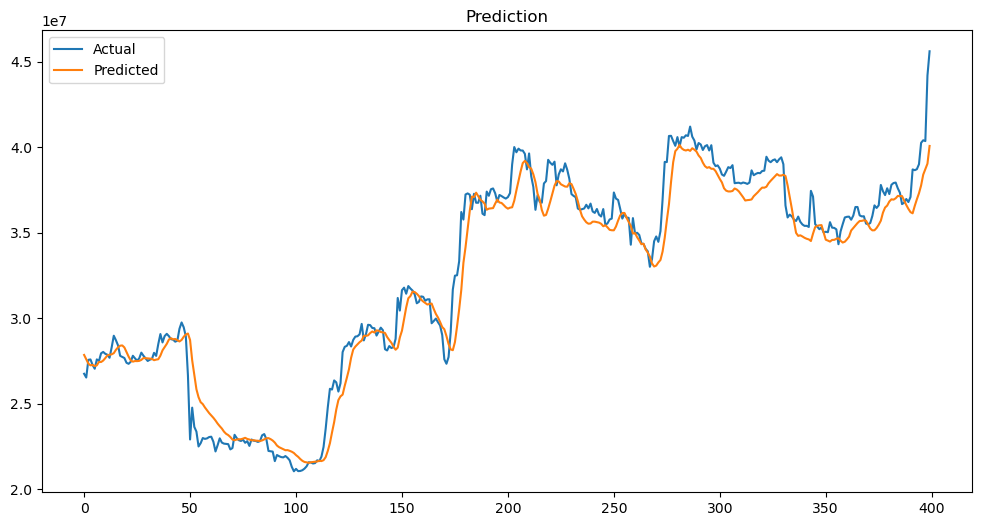

In [42]:
visualization(close, price_p, 400, dot = 'N')

### 9. Indicators only using Close

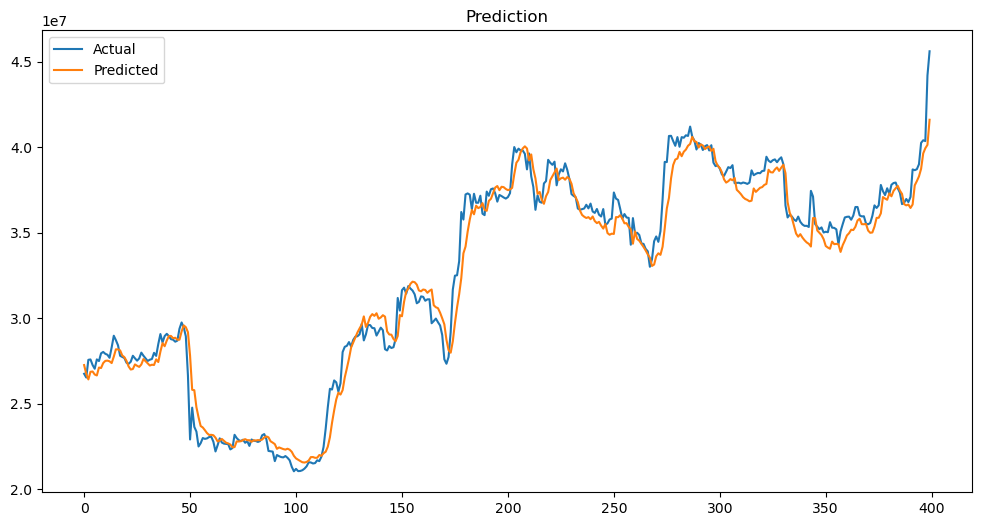

In [50]:
visualization(close, price_c, 400, dot = 'N')

### x축 = Days, y축 = Price

# Up/Down

### 1. All

In [25]:
pred_UpDown(price_all)

Yesterday Predict : 40988260.0    Today's Predict : 41746084.0
=== 1.832 %  Up ===


### 2. Trends

In [26]:
pred_UpDown(price_t)

Yesterday Predict : 41418756.0    Today's Predict : 42314760.0
=== 2.14 %  Up ===


### 3. Trends and Volume

In [27]:
pred_UpDown(price_tv)

Yesterday Predict : 40911844.0    Today's Predict : 41635960.0
=== 1.754 %  Up ===


### 4. Trends and Market

In [28]:
pred_UpDown(price_tm)

Yesterday Predict : 41478444.0    Today's Predict : 42247380.0
=== 1.837 %  Up ===


### 5. Trends and Market with Positive Correlation

In [29]:
pred_UpDown(price_tmp)

Yesterday Predict : 42288510.0    Today's Predict : 43613790.0
=== 3.086 %  Up ===


### 6. Elasticity

In [30]:
pred_UpDown(price_e)

Yesterday Predict : 41398524.0    Today's Predict : 39867730.0
=== 3.767 %  Down ===


### 7. Elasticity and Market 

In [31]:
pred_UpDown(price_em)

Yesterday Predict : 42478590.0    Today's Predict : 43350200.0
=== 2.031 %  Up ===


### 8. Positive Correlation

In [32]:
pred_UpDown(price_p)

Yesterday Predict : 40068210.0    Today's Predict : 41258428.0
=== 2.927 %  Up ===


### 9. Indicators only using Close

In [33]:
pred_UpDown(price_c)

Yesterday Predict : 41597524.0    Today's Predict : 42608560.0
=== 2.401 %  Up ===


# CheckMasking

In [34]:
close_mask = mask_UpDown(close, t='C')

### 1. All

In [35]:
# Masking Up or Down
all_mask = mask_UpDown(price_all)

In [37]:
mask_check(close_mask, all_mask, 100)

55.0 %  Correct


### 2. Trends

In [38]:
t_mask = mask_UpDown(price_t)

In [39]:
mask_check(close_mask, t_mask, 100)

53.0 %  Correct


### 3. Trends and Volume

In [40]:
tv_mask = mask_UpDown(price_tv)

In [41]:
mask_check(close_mask, tv_mask, 100)

52.0 %  Correct


### 4. Trends and Market

In [42]:
tm_mask = mask_UpDown(price_tm)

In [43]:
mask_check(close_mask, tm_mask, 100)

52.0 %  Correct


### 5. Trends and Market with Positive Correlation

In [44]:
tmp_mask = mask_UpDown(price_tmp)

In [45]:
mask_check(close_mask, tmp_mask, 100)

45.0 %  Correct


### 6. Elasticity

In [46]:
e_mask = mask_UpDown(price_e)

In [47]:
mask_check(close_mask, e_mask, 100)

50.0 %  Correct


### 7. Elasticity and Market 

In [48]:
em_mask = mask_UpDown(price_em)

In [49]:
mask_check(close_mask, em_mask, 100)

49.0 %  Correct


### 8. Positive Correlation

In [50]:
p_mask = mask_UpDown(price_p)

In [51]:
mask_check(close_mask, p_mask, 100)

50.0 %  Correct


### 9. Indicators only using Close

In [52]:
c_mask = mask_UpDown(price_c)

In [53]:
mask_check(close_mask, c_mask, 100)

54.0 %  Correct


# Earning Rate

### 1. All

In [104]:
earning_rate(all_mask, close, 100)

21.552 %


In [116]:
a = all_mask[-78:-58] 
c = close[-79:-58]
earning_rate(a, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-0.251 %


### 2. Trends

In [57]:
earning_rate(t_mask, close, 100)

18.552 %


In [106]:
t = t_mask[-78:-58] 
earning_rate(t, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-0.313 %


### 3. Trends and Volume

In [58]:
earning_rate(tv_mask, close, 100)

20.602 %


In [107]:
tv = tv_mask[-78:-58] 
earning_rate(tv, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-0.313 %


### 4. Trends and Market

In [59]:
earning_rate(tm_mask, close, 100)

16.056 %


In [108]:
tm = tm_mask[-78:-58] 
earning_rate(tm, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-0.018 %


### 5. Trends and Market with Positive Correlation

In [60]:
earning_rate(tmp_mask, close, 100)

4.418 %


In [109]:
tmp = tmp_mask[-78:-58] 
earning_rate(tmp, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-0.546 %


### 6. Elasticity

In [61]:
earning_rate(e_mask, close, 100)

13.467 %


In [110]:
e = e_mask[-78:-58] 
earning_rate(e, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-7.201 %


### 7. Elasticity and Market 

In [62]:
earning_rate(em_mask, close, 100)

18.565 %


In [111]:
em = em_mask[-78:-58] 
earning_rate(em, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-2.537 %


### 8. Positive Correlation

In [63]:
earning_rate(p_mask, close, 100)

11.576 %


In [112]:
p = p_mask[-78:-58] 
earning_rate(p, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-0.251 %


### 9. Indicators only using Close

In [64]:
earning_rate(c_mask, close, 100)

22.68 %


In [115]:
ci = c_mask[-78:-58] 
earning_rate(ci, c, 20) # 8-8 ~ 8-28 급락 포함 시기의 수익률

-0.313 %
